In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_excel('DataGamelan-1.xlsx', sheet_name='databinerSemua')
df.head()

,Unnamed: 0,data input,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,...,Instrumen,lagu ke,irama,gendhing,bagian,baris,gatra,note1,note2,...,Peking25,Peking26,Peking27,Peking28,Peking29,Peking30,Peking31,Peking32,Laras,Pathet
1,NaN,0,1,2,3,4,5,6,7,8,...,162,163,164,165,166,167,168,169,170,171
2,Sampak Nem Slendro Nem,0,2,1,0,lagu,1,1,5,5,...,6,0,0,0,5,0,0,0,0,0
3,NaN,0,2,1,0,lagu,1,2,3,3,...,5,0,0,0,3,0,0,0,0,0
4,NaN,0,2,1,0,lagu,2,1,3,3,...,5,0,0,0,3,0,0,0,0,0


In [73]:
# Rename header kolom input
df = df.rename(columns=dict(zip(df.columns, df.iloc[0])))
df

,,Instrumen,lagu ke,irama,gendhing,bagian,baris,gatra,note1,note2,...,Peking25,Peking26,Peking27,Peking28,Peking29,Peking30,Peking31,Peking32,Laras,Pathet
0,...,Instrumen,lagu ke,irama,gendhing,bagian,baris,gatra,note1,note2,...,Peking25,Peking26,Peking27,Peking28,Peking29,Peking30,Peking31,Peking32,Laras,Pathet
1,NaN,0,1,2,3,4,5,6,7,8,...,162,163,164,165,166,167,168,169,170,171
2,Sampak Nem Slendro Nem,0,2,1,0,lagu,1,1,5,5,...,6,0,0,0,5,0,0,0,0,0
3,NaN,0,2,1,0,lagu,1,2,3,3,...,5,0,0,0,3,0,0,0,0,0
4,NaN,0,2,1,0,lagu,2,1,3,3,...,5,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,NaN,0,5,4,6,lagu,1,4,5,3,...,7,2,2,7,7,2,2,7,1,4
768,NaN,0,5,4,6,lagu,2,1,3,3,...,5,6,6,5,5,6,6,5,1,4
769,NaN,0,5,4,6,lagu,2,2,2,7,...,6,5,5,6,6,5,5,6,1,4
770,NaN,0,5,4,6,lagu,2,3,7,6,...,3,7,7,3,3,7,7,3,1,4


In [74]:
# Fungsi untuk mengubah nilai nada tinggi dan rendah ke integer
def convert_note_values(x):
	if x[1:] == "'":
		return int(x[:1])
	elif x[1:] == ",":
		return int(x[:1])

# Fungsi untuk mengubah nilai underscore ke integer	
def convert_underscore(x):
	if x[:1] == "1" and x[1:] == '_':
		return int(x[:1])
	else:
		return int(x[:1]+x[:1])

# Select columns input
df_input = df.loc[:, ['lagu ke', 'irama', 'baris', 'gatra', 'note1', 'note2', 'note3', 'note4', 'Laras', 'Pathet']]

# Fungsi untuk mengubah nilai nada tinggi dan rendah ke integer
for col in df_input.columns:
	if 'note' in col:
		df_input[col] = df_input[col].apply(lambda x: convert_note_values(x) if isinstance(x, str) else x)

df_input = df_input.iloc[2:, :]
df_input

,lagu ke,irama,baris,gatra,note1,note2,note3,note4,Laras,Pathet
2,2,1,1,1,5.0,5.0,5.0,5.0,0,0
3,2,1,1,2,3.0,3.0,3.0,3.0,0,0
4,2,1,2,1,3.0,3.0,3.0,3.0,0,0
5,2,1,2,2,5.0,5.0,5.0,5.0,0,0
6,2,1,2,3,2.0,2.0,2.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...
767,5,4,1,4,5.0,3.0,2.0,7.0,1,4
768,5,4,2,1,3.0,3.0,6.0,5.0,1,4
769,5,4,2,2,2.0,7.0,5.0,6.0,1,4
770,5,4,2,3,7.0,6.0,7.0,3.0,1,4


In [75]:
# Mengambil data sesuai dengan instrumen

### Data Instrumen Terpisah
kenong = df.iloc[2:, 12:20]
kethuk = df.iloc[2:, 20:28]
kempul = df.iloc[2:, 28:32]
gongKecil = df.iloc[2:, 32]
gongBesar = df.iloc[2:, 33]
gong = df.iloc[2:, 32:34]
kempyang = df.iloc[2:, 34:42]
bonang_barung = df.iloc[2:, 42:74]
bonang_penerus = df.iloc[2:, 74:138]
peking = df.iloc[2:, 138:170]

In [76]:
# Fungsi menggabungkan data dari kolom 1 dengan kolom lainnya
def concate_colom(df, colName):
  df_transposed = df.transpose()
  df_gabungan = pd.concat([df_transposed[col] for col in df_transposed.columns], axis=0, ignore_index=True)
  df_gabungan = pd.DataFrame(df_gabungan, columns=[colName])
  return df_gabungan

In [77]:
for col in bonang_barung.columns:
	bonang_barung[col] = bonang_barung[col].apply(lambda x: convert_underscore(x) if isinstance(x, str) else x)

for col in bonang_penerus.columns:
	bonang_penerus[col] = bonang_penerus[col].apply(lambda x: convert_underscore(x) if isinstance(x, str) else x)

for col in peking.columns:
	peking[col] = peking[col].apply(lambda x: convert_note_values(x) if isinstance(x, str) else x)

In [78]:
# Menggabungkan kolom

### Data instrumen gabungan
df_kenong = concate_colom(kenong, 'kenong')
df_kethuk = concate_colom(kethuk, 'kethuk')
df_kempul = concate_colom(kempul, 'kempul')
df_kempyang = concate_colom(kempyang, 'kempyang')
df_bonang_barung = concate_colom(bonang_barung, 'bonang_barung')
df_bonang_penerus = concate_colom(bonang_penerus, 'bonang_penerus')
df_peking = concate_colom(peking, 'peking')
df_gong = concate_colom(gong, 'gong')

In [79]:
for col in df_bonang_barung.columns:
	df_bonang_barung[col] = df_bonang_barung[col].apply(lambda x: convert_underscore(x) if isinstance(x, str) else x)

for col in df_bonang_penerus.columns:
	df_bonang_penerus[col] = df_bonang_penerus[col].apply(lambda x: convert_underscore(x) if isinstance(x, str) else x)

for col in df_peking.columns:
	df_peking[col] = df_peking[col].apply(lambda x: convert_note_values(x) if isinstance(x, str) else x)

In [80]:
# mengambil data gendhing 0, 1, 2, dst
df_gendhing0 = df_input.iloc[:56]
df_gendhing1 = df_input.iloc[56:135]
df_gendhing2 = df_input.iloc[135:306]
df_gendhing3 = df_input.iloc[306:494]
df_gendhing4 = df_input.iloc[494:558]
df_gendhing5 = df_input.iloc[558:658]
df_gendhing6 = df_input.iloc[658:770]

In [99]:
# Fungsi membuat plot korelasi
def plot_correlation(nama, gendhing, folder, df_gendhing, output, title, lebar=20, tinggi=15):
    df_input = pd.merge(df_gendhing, output, left_index=True, right_index=True)
    corr = df_input.corr()
    plt.figure(figsize=(lebar, tinggi))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.savefig(f"J:/Kuliah/Riset/Gamelan/Korelasi/Gendhing {gendhing}/{folder}/{nama}.png", dpi=350)
    plt.close()

In [100]:
df_gendhing = [df_gendhing0, df_gendhing1, df_gendhing2, df_gendhing3, df_gendhing4, df_gendhing5, df_gendhing6]
instrumen = ["Kenong", "Kethuk", "Kempul", "Kempyang", "Bonang Barung", "Bonang Penerus", "Peking"]
terpisah = [kenong, kethuk, kempul, kempyang, bonang_barung, bonang_penerus, peking]
gabungan = [df_kenong, df_kethuk, df_kempul, df_kempyang, df_bonang_barung, df_bonang_penerus, df_peking]

In [107]:
for i, gendhing in enumerate(df_gendhing):
    for j in range(7):
        plot_correlation(instrumen[j], i, "Gabungan", gendhing, gabungan[j], f"Korelasi Gendhing {i} dengan {instrumen[j]}")
        plot_correlation("Gong", i, "Gabungan", gendhing, df_gong, f"Korelasi Gendhing {i} dengan Gong")

### Korelasi Gendhing 0 dengan kolom terpisah

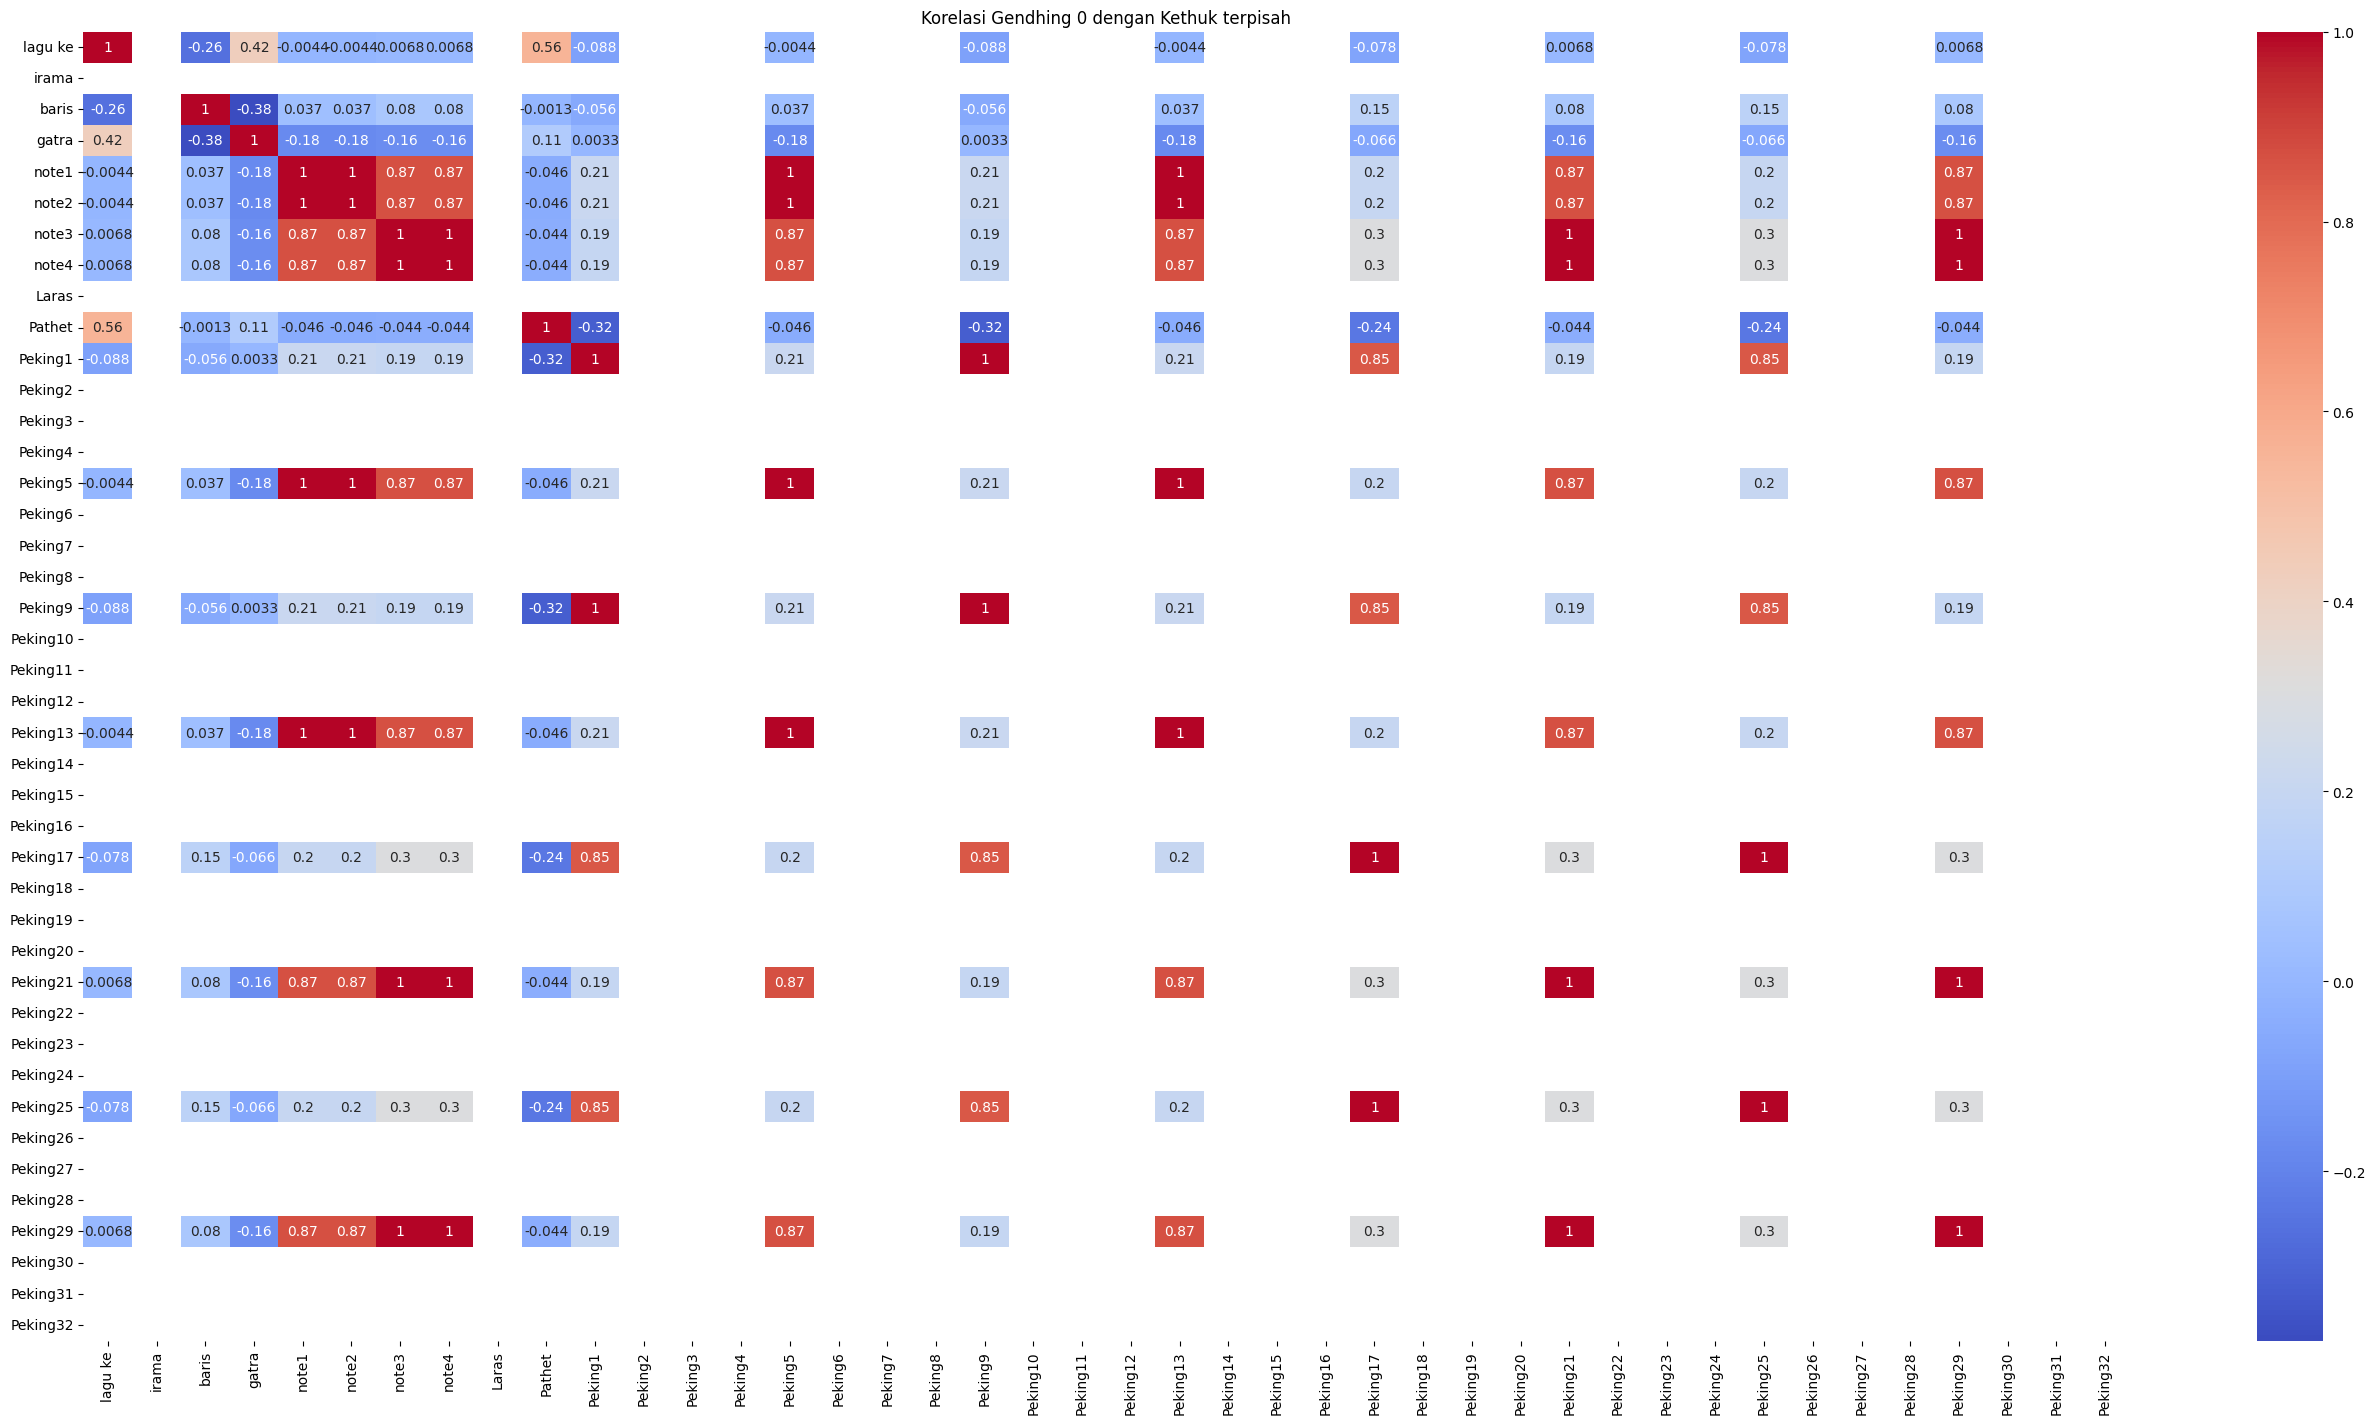

In [103]:
df_input_kethuk = pd.merge(df_gendhing0, peking, left_index=True, right_index=True)
corr = df_input_kethuk.corr()
plt.figure(figsize=(33, 17))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Gendhing 0 dengan Kethuk terpisah")
plt.show()

# =============================================